In [106]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
import main.packages.unchain_chain as chain
import main.packages.mine_generic as mine_g
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re

colormap = plt.colormaps['Paired']
# num_colors = len(colormap.colors)
# colors = [colormap(i / num_colors) for i in range(num_colors)]
# num_bars = len(rmse_df.columns)
# colors = [colormap(i / num_bars) for i in range(num_bars)]  # Normalize the range [0, num_bars) to [0, 1)


In [107]:
def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

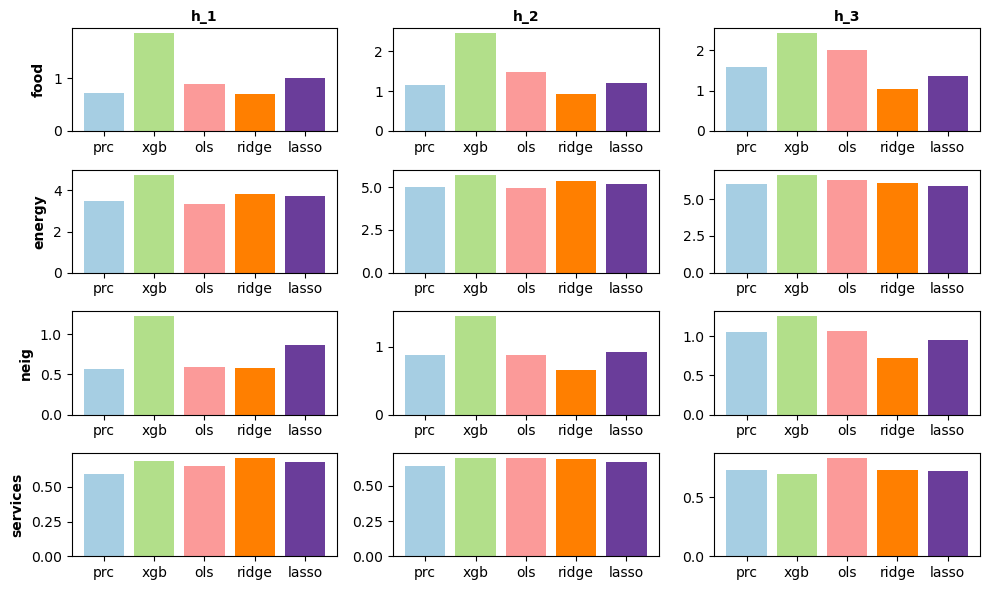

In [120]:
cat_short = ["food", "energy", "neig", "services"]

fig, ax = plt.subplots(4, 3, figsize = (10, 6))

for in_cat, cat in enumerate(cat_short):
    
    rmse_df = pd.read_csv(f"data/report_rmse/{cat}.csv", index_col=0)

    for in_h in range(rmse_df.shape[0]):
        new_col_names = [get_first_part(col, "_") for col in rmse_df.columns]
        
        # # Normalize the color range based on the number of columns
        num_bars = len(rmse_df.columns)
        colors = [colormap(i / num_bars) for i in range(num_bars)] 

        ax[in_cat, in_h].bar(new_col_names, rmse_df.iloc[in_h, :], color = colors)
    ax[in_cat, 0].set_ylabel(cat_short[in_cat], rotation=90, fontsize=10, labelpad=5, fontweight = 'bold')

for j, col_title in enumerate(rmse_df.index):
    ax[0, j].set_title(col_title, fontsize=10, pad = 5, fontweight = 'bold')

plt.tight_layout()
plt.show()
